In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow")
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_plots = os.path.join(os.getcwd(),  "Scenarios")

generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)

In [15]:
load_data.head()

,0,1
0,946080000,12130.119545
1,946083600,12039.119545
2,946087200,11778.619545
3,946090800,11512.119545
4,946094400,11258.619545


In [16]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')

In [17]:
conventionals_join.head()

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,20060200045,WASTE,1.9,0.30,1.768,1.768,6.384866e+05,2.340919e+07,1.542685e+04,2.277070e+07
1,20010300022,NATURAL_GAS,4.2,0.51,245.000,245.000,7.792445e+07,3.212320e+09,1.488947e+06,3.134396e+09
2,20190300021,NATURAL_GAS,4.2,0.52,341.000,341.000,1.236229e+08,4.488144e+09,2.404666e+06,4.364521e+09
3,19970300024,NATURAL_GAS,4.2,0.52,341.000,341.000,1.199436e+08,4.484465e+09,2.333097e+06,4.364521e+09
4,20160300054,NATURAL_GAS,4.2,0.59,420.000,420.000,1.674769e+08,5.560612e+09,3.656026e+06,5.393135e+09


In [18]:
storage_levels_data.head()

,Unnamed: 0,value
0,20202600053,10000.0
1,20202600055,9000.0
2,20202600056,7500.0
3,20202600057,5000.0
4,20202600058,2500.0


In [19]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True)
load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
load_generation.reset_index(inplace=True )
load_generation.drop("index", axis=1, inplace=True)

In [20]:
#load_generation.rename(columns={1: "load" }, inplace=True)
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)
load_generation.drop(1, axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,load_shedding
0,1575.246974,8081.872572,0.0,-0.000000,0.0
1,1835.268885,8071.768000,0.0,-196.167340,0.0
2,1978.909560,8071.768000,0.0,-250.558015,0.0
3,1625.769605,8252.349941,0.0,-0.000000,0.0
4,2898.804046,6998.583949,0.0,-0.018450,0.0


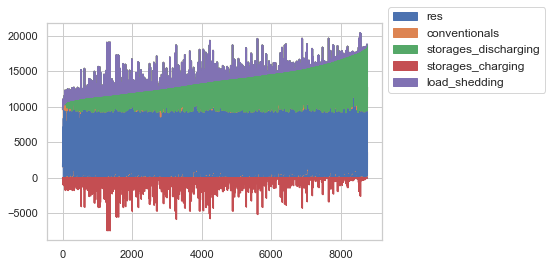

In [21]:
load_generation.plot.area()
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

In [22]:
# plt.stackplot(load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_charging,
#               labels=['RES', 'conventional', "load shedding", "dish", "charg"])

In [23]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()

<AxesSubplot:>

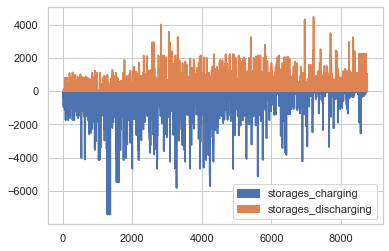

In [24]:
storages.plot.area()

<AxesSubplot:>

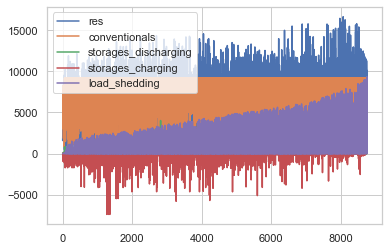

In [25]:
load_generation.plot()